In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading all the data
X_train = pd.read_csv('/root/Desktop/Research Set/X_train.csv', sep= ' ', header=None)
X_test = pd.read_csv('/root/Desktop/Research Set/X_test.csv', sep= ' ', header=None)
y_train = pd.read_csv('/root/Desktop/Research Set/y_train.csv', header=None)
y_test = pd.read_csv('/root/Desktop/Research Set/y_test.csv', header=None)

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from sklearn.metrics import accuracy_score

In [5]:
#Fitting the K-Nearest Classifier Model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

/root/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


In [6]:
print(accuracy_score(y_test, y_pred))

0.884882985452


In [8]:
#Finding the optimal model by varying the value of the no. of neighbors and finding accuracy for each
scores = []
for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors = i, n_jobs = -1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

/root/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


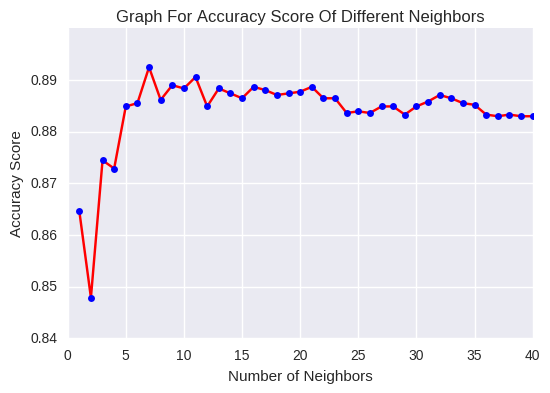

In [18]:
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.title('Graph For Accuracy Score Of Different Neighbors')
xticks = range(1,41)
plt.plot(xticks, scores, color='red', linestyle='solid', marker='o',
         markerfacecolor='blue', markersize=5)

In [20]:
scores = np.asarray(scores)

In [30]:
#Final result after training the model
print'No. Of Neighbors:', scores.argmax()+1
print'Accuracy Score:', scores.max()

No. Of Neighbors: 7
Accuracy Score: 0.89247311828


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred))

/root/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


0.884566729918


In [46]:
#Applying Grid Search Cross Validation to find optimal parameters of the Random Forest Model
clf = RandomForestClassifier()
parameters = {'n_estimators': [10, 100, 1000], 'max_depth': [3, 6, 9], 'max_features' : ['auto', 'log2']}
model = GridSearchCV(clf, parameters ,n_jobs=-1,cv=4,scoring='accuracy', verbose = 3)

In [43]:
#Reshaping the y_train array to fit to the GridSearch model
y_train = np.array(y_train)
c,r = y_train.shape
y_train = y_train.reshape(c,)

In [47]:
#Fitting the model with the parameters in the 'parameters' dictionary and finding out the best set of parameters
model.fit(X_train, y_train)
model.grid_scores_, model.best_params_, model.best_score_

Fitting 4 folds for each of 18 candidates, totalling 72 fits
[CV] max_features=auto, n_estimators=10, max_depth=3 .................
[CV] max_features=auto, n_estimators=10, max_depth=3 .................
[CV] max_features=auto, n_estimators=10, max_depth=3 .................
[CV] max_features=auto, n_estimators=10, max_depth=3 .................
[CV]  max_features=auto, n_estimators=10, max_depth=3, score=0.822291 -   0.6s
[CV] max_features=auto, n_estimators=100, max_depth=3 ................
[CV]  max_features=auto, n_estimators=10, max_depth=3, score=0.836336 -   0.7s
[CV] max_features=auto, n_estimators=100, max_depth=3 ................
[CV]  max_features=auto, n_estimators=10, max_depth=3, score=0.801649 -   0.7s
[CV] max_features=auto, n_estimators=100, max_depth=3 ................
[CV]  max_features=auto, n_estimators=10, max_depth=3, score=0.853306 -   0.8s
[CV] max_features=auto, n_estimators=100, max_depth=3 ................
[CV]  max_features=auto, n_estimators=100, max_depth=3,

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.6min


[CV]  max_features=auto, n_estimators=10, max_depth=6, score=0.864920 -   1.1s
[CV] max_features=auto, n_estimators=100, max_depth=6 ................
[CV]  max_features=auto, n_estimators=10, max_depth=6, score=0.862069 -   1.2s
[CV] max_features=auto, n_estimators=100, max_depth=6 ................
[CV]  max_features=auto, n_estimators=10, max_depth=6, score=0.854199 -   1.1s
[CV] max_features=auto, n_estimators=100, max_depth=6 ................
[CV]  max_features=auto, n_estimators=10, max_depth=6, score=0.918388 -   1.2s
[CV] max_features=auto, n_estimators=100, max_depth=6 ................
[CV]  max_features=auto, n_estimators=100, max_depth=6, score=0.872362 -   9.7s
[CV] max_features=auto, n_estimators=1000, max_depth=6 ...............
[CV]  max_features=auto, n_estimators=100, max_depth=6, score=0.884951 -  10.0s
[CV] max_features=auto, n_estimators=1000, max_depth=6 ...............
[CV]  max_features=auto, n_estimators=100, max_depth=6, score=0.864503 -  10.1s
[CV] max_features=

[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  9.2min finished
/root/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:639: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.82838, std: 0.01895, params: {'max_features': 'auto', 'n_estimators': 10, 'max_depth': 3},
  mean: 0.81988, std: 0.02709, params: {'max_features': 'auto', 'n_estimators': 100, 'max_depth': 3},
  mean: 0.82915, std: 0.03001, params: {'max_features': 'auto', 'n_estimators': 1000, 'max_depth': 3},
  mean: 0.76413, std: 0.04577, params: {'max_features': 'log2', 'n_estimators': 10, 'max_depth': 3},
  mean: 0.78241, std: 0.03410, params: {'max_features': 'log2', 'n_estimators': 100, 'max_depth': 3},
  mean: 0.78821, std: 0.03724, params: {'max_features': 'log2', 'n_estimators': 1000, 'max_depth': 3},
  mean: 0.87486, std: 0.02542, params: {'max_features': 'auto', 'n_estimators': 10, 'max_depth': 6},
  mean: 0.88451, std: 0.01975, params: {'max_features': 'auto', 'n_estimators': 100, 'max_depth': 6},
  mean: 0.88657, std: 0.01779, params: {'max_features': 'auto', 'n_estimators': 1000, 'max_depth': 6},
  mean: 0.85271, std: 0.02470, params: {'max_features': 'log2', 'n_estimators': 10

In [48]:
#Fitting the model with best calculated parameters
clf = RandomForestClassifier(max_depth = 9, n_estimators = 1000, max_features = 'log2')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.90449082859
